## R ggplots in a Python notebook

The following are some examples of how to replicate a ggplot from R into a Python notebook.

#### Widgets
This example uses rpy2 and writes R code in a Pythonic way. In addition we use widgets so that we can make it interactive.

In [1]:
import numpy as np
import pandas as pd
from ipywidgets import interactive
from IPython.display import Image

In [2]:
from rpy2 import robjects
from rpy2.robjects.packages import importr, data
from rpy2.robjects.lib import grdevices
from rpy2.robjects.lib.dplyr import DataFrame
import rpy2.robjects.lib.ggplot2 as ggplot2
datasets = importr('datasets')
datasets = robjects.packages.importr('datasets')
mtcars = robjects.packages.data(datasets).fetch('mtcars')['mtcars']

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/lib/dplyr.py:24: UserWarning: This was designed againt dplyr version 0.7.5 but you have 0.8.0.1
  warnings.warn('This was designed againt dplyr version %s but you have %s' % (TARGET_VERSION, dplyr.__version__))
/opt/conda/lib/python3.7/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.1.1
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [3]:
def interactive_ggplot(gear_value = 4):
    with grdevices.render_to_bytesio(grdevices.jpeg, width=512, height=448, res=150) as img:
        gp = ggplot2.ggplot(eval(f"DataFrame(mtcars).filter('gear == {gear_value}')"))
        pp = (
            gp +
            ggplot2.aes_string(x = 'wt', y = 'mpg') +
            ggplot2.geom_point(ggplot2.aes_string(col='qsec')) +
            ggplot2.scale_color_gradient(low = 'yellow', high = 'red') +
            ggplot2.labs(title = 'Rpy2 Mtcars in ggplot') +
            ggplot2.theme_bw()
        )

        pp.plot()

    display(Image(data = img.getvalue(), format = 'jpeg', embed = True))

In [4]:
w = interactive(
    interactive_ggplot,
        gear_value = np.unique(DataFrame(mtcars).select('gear'))
)
w

interactive(children=(Dropdown(description='gear_value', index=1, options=(3.0, 4.0, 5.0), value=4.0), Output(…

## Magic R command

An alternative way to use the `rpy2` library is to the magic R command `%%R` at the start of a cell. This will allow us to use `R` commands in the cell.

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')

import rpy2
# The following line is needed to activate the magic R command
%load_ext rpy2.ipython

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


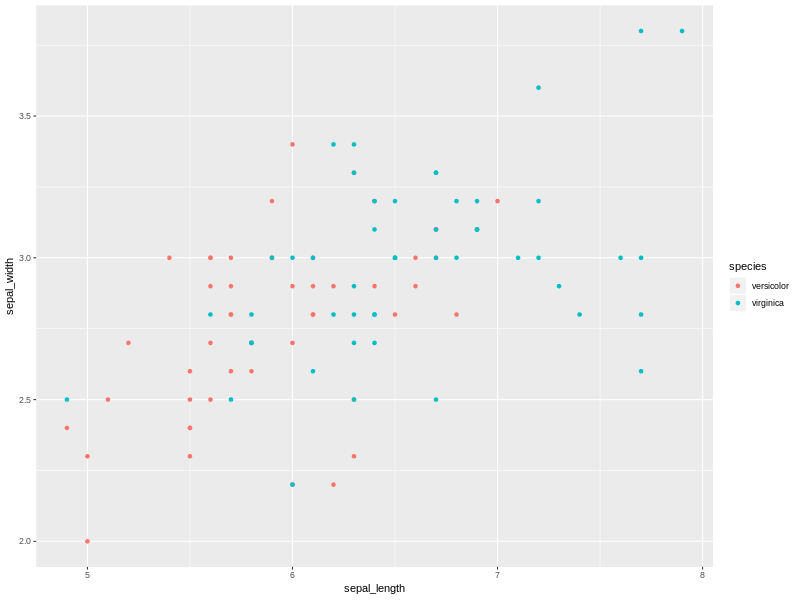

In [6]:
%%R -i iris -w 800 -h 600
# In this cell we can now use R code.
# The `-i` refers to which dataframes you want to import from Python and convert to an R dataframe
# The `w` and `h` refers to the width and height of the output
suppressPackageStartupMessages({
    library(tidyverse)
    library(ggplot2)
})
iris %>%
    filter(species != 'setosa') %>%
    ggplot(aes(x = sepal_length, y = sepal_width, col = species)) +
    geom_point()